In [1]:
#import necessary libraries
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# read dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# Analyse dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# check null values
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'Scores')

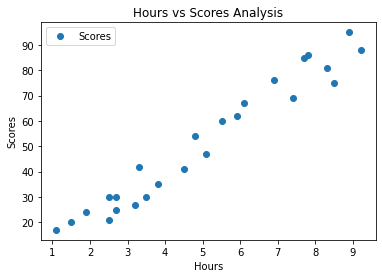

In [9]:
# plotting the dataset
df.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Scores Analysis")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [16]:
# building model 
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

(array([9.91065648]), 2.018160041434662)

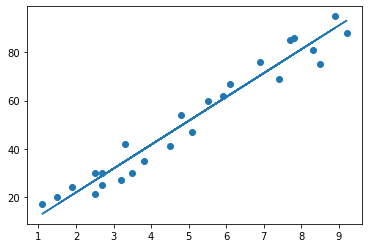

In [19]:
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show
regressor.coef_,regressor.intercept_

In [20]:
#predicted values
print(X_test)
y_pred= regressor.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [21]:
# Actual values
print(y_test)

[20 27 69 30 62]


In [22]:
# actual vs predicted values
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
regressor.score(X_train,y_train)

0.9515510725211552

In [24]:
regressor.score(X_test,y_test)

0.9454906892105354

In [26]:
pred_score= regressor.predict([[9.25]])
print(pred_score)

[93.69173249]


In [27]:
# Evaluation of Model
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(df1.Actual,y_pred))
print(np.sqrt(metrics.mean_squared_error(df1.Actual,y_pred)))

4.183859899002982
21.598769307217456
4.647447612100373
